In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 3:  Interpolation

## Question 1

Consider data at three points $(x_0, y_0) = (0, 0)$, $(x_1, y_1) = (1, 2)$, and $(x_2, y_2) = (2, 2)$.

**(a)** (7 points) Analytically find the interpolating polynomial $P(x)$ in
 - the monomial basis,
 - the Lagrange basis, and
 - the Newton basis.

For the monomial basis we have

$$
\begin{bmatrix}
1 & 0 & 0\\
1 & 1 & 1\\
1 & 2 & 4\\
\end{bmatrix}
\begin{bmatrix}
p_0 \\  p_1 \\ p_2
\end{bmatrix} = 
\begin{bmatrix}
0 \\ 2 \\ 2
\end{bmatrix}
$$

We then solve solve this system
$$
\begin{bmatrix}
1 & 0 & 0 & 0\\
1 & 1 & 1 & 2\\
1 & 2 & 4 & 2\\
\end{bmatrix} \rightarrow
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 1 & 2\\
0 & 2 & 4 & 2\\
\end{bmatrix} \rightarrow
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 1 & 2\\
0 & 0 & 2 & -2\\
\end{bmatrix} \rightarrow
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 1 & 2\\
0 & 0 & 1 & -1\\
\end{bmatrix} \rightarrow
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 3\\
0 & 0 & 1 & -1\\
\end{bmatrix}
$$

Which leaves us with the polynomial $P(x) = 3x - x^2$


For the Lagrange basis we have 

$$
\begin{align}
P(x) &= y_0\frac{x - x_1}{x_0 - x_1}\frac{x - x_2}{x_0 - x_2} + y_1\frac{x - x_0}{x_1 - x_0}\frac{x - x_2}{x_1 - x_2} + y_2\frac{x - x_0}{x_2 - x_0}\frac{x - x_1}{x_2 - x_1} \\
P(x) &=  2\frac{x - 0}{1 - 0}\frac{x - 2}{1 - 2} + 2\frac{x - 0}{2 - 0}\frac{x - 1}{2 - 1} \\
P(x) &= -2x(x-2) + x(x-1) \\
P(x) &= x(-2(x-2) + x-1) \\
P(x) &= x(-2x + 4 + x-1) \\
P(x) &= x(3-x) 
\end{align}
$$

For the newton polynomial we have

$$
\begin{align}
a_1 &= 0 \\
a_2 &= \frac{2-0}{1-0} = 2 \\
a_3 &= \frac{2 - (2 (2 - 0)(2-1)}{(2 - 0)(2-1)} = -1
\end{align}
$$

So we have polynomial
$$
P(x) = 2x - x(x-1)
$$

**(b)** (8 points) Show that these all lead to the same polynomial (show that $P(x)$ is in fact unique).

Proof by contradiction. We know from the previous problem that the polynomial $P(x) = -x^2 + 3x$ is a 2nd order polynomial that passes through our three interpolation points, $(x_0, y_0) = (0, 0)$, $(x_1, y_1) = (1, 2)$, and $(x_2, y_2) = (2, 2)$ . Let's assume there is another polynomial 2nd degree polynomial $P_2(x)=ax^2+bx+c$ that also passes through these points.

We can write this relationship in matrix form 
$$
\begin{bmatrix}
1 & 0 & 0\\
1 & 1 & 1\\
1 & 2 & 4\\
\end{bmatrix}
\begin{bmatrix}
c \\  b \\ a
\end{bmatrix} = 
\begin{bmatrix}
0 \\ 2 \\ 2
\end{bmatrix}
$$

As we showed earlier we have solution $a=-1, b=3, c=0$ or in matrix form

$$
\begin{bmatrix}
1 & 0 & 0\\
1 & 1 & 1\\
1 & 2 & 4\\
\end{bmatrix}
\begin{bmatrix}
0 \\  3 \\ -1
\end{bmatrix} = 
\begin{bmatrix}
0 \\ 2 \\ 2
\end{bmatrix}
$$

Now we show that our solution is unique, which we do by showing that our system is invertable as that implies the function is both injective and surjective. Because we have a square system, it is invertable precisely when 
$$
det \begin{bmatrix}
1 & 0 & 0\\
1 & 1 & 1\\
1 & 2 & 4\\
\end{bmatrix} \neq 0
$$

So we have 
$$
det \begin{bmatrix}
1 & 0 & 0\\
1 & 1 & 1\\
1 & 2 & 4\\
\end{bmatrix} = 4 - 2 = 2 \neq 0
$$

Thus the system is invertable and our solution is unique. But this is the same as our first solution, so by contradiction, $P(x) = -x^2 + 3x$ is the only 2nd order interpolating polynomial that passes through our 3 points. Therefore it is the only polynomial we could have gotten with any interpolation method.

We can see in our case that all our polynomials are the same
$$
\begin{align}
P(x) &= -x^2 + 3x & \text{Monomial Basis} \\
P(x) &= 3x - x^2  \\
P(x) &= x(3-x) & \text{Lagrange Basis} \\
P(x) &= x(2 + 1 - x)) \\
P(x) &= x(2 - (x - 1)) \\
P(x) &= 2x - x(x - 1)) &\text{Newton Basis}
\end{align}
$$

## Question 2

(10 points) The $n$th Chebyshev polynomial is characterized (up to a constant) by the identity

$$T_n(\cos \theta) = \cos (n \theta)$$

Use this identity to show that the Chebyshev polynomials are orthogonal on $x\in[-1,1]$ with respect to the weight

$$w(x) = \frac{1}{\sqrt{1 - x^2}}$$

To do this you must prove that

$$\int^1_{-1} w(x) T_n(x) T_m(x) dx = \left \{ \begin{aligned} a & ~ & m = n \\ 0 & ~ & m \neq n \end{aligned} \right .$$

where $a$ is a finite constant (also find this coefficient).

From the identity we have $T_n(x) = cos(n cos^-1 (x))$, so we can make a change of variable defined as 
$$
y = cos^{-1} (x) \\
dy = -\frac{1}{\sqrt {1 - x^2}}dx
$$

$$
\begin{align}
\int^1_{-1} w(x) T_n(x) T_m(x)dx &= -\int^{-1}_{1} w(x) T_n(x) T_m(x)dx \\
&= -\int^{-1}_{1}T_n(x) T_m(x) \frac{1}{\sqrt{1-x^2}}dx \\
&= \int^{cos^{-1}(-1)}_{cos^{-1}(1)} T_n(cos y) T_m(cos y) dy\\
&= \int^\pi_{0} cos(ny) cos(my) dy \\
&= \int^\pi_{0} \frac{cos(ny - my) + cos(ny + my)}{2}dy \\
&= \int^\pi_{0} \frac{cos(y(n - m)) + cos(y(n + m))}{2}dy \\
&= \frac{1}{2}\int^\pi_{0} cos(y(n - m)) + cos(y(n + m))dy \\
\end{align}
$$

When $m=n$, the integral is equal to $\pi$, so the expression is equal to the constant $\frac{\pi}{2}$. When $m \neq n$ The two cos expressions cancel under the integral bounds and the expression goes to 0. So we have

$$
\int^1_{-1} w(x) T_n(x) T_m(x)dx = \left \{\begin{aligned} \frac{\pi}{2} & ~ & m = n \\ 0 & ~ & m \neq n \end{aligned} \right .
$$

Which means the two polynomials are orthogonal with respect to the given weight

## Question 3 - The Lebesgue Function

Consider the Lebesgue function
$$
\lambda_N(x)  = \sum_{i=0}^N\big{|}\ell_i(x)\big{|}
$$
where $\ell_i(x)$ are Lagrange basis functions for a given set of $x_i$.  The maximum of the Lebesgue function is called $\Lambda_n$ the Lebesgue constant and are clearly related to Lagrangian interpolation as they provide a first estimate for the interpolation error.  Unfortunately, $\Lambda_N$ is not uniformly bounded regardless of the nodes used as one can show that 
$$
    \Lambda_N > \mathcal{O}(\log N) ~~~\text{as}~~~ N \rightarrow \infty
$$

Note, $\Lambda_n$ is the infinite-norm of the linear operator mapping data to interpolant on the given grid and interval.

**(a)** (5 points) What do you expect the Lebesgue function to look like?  Are there key points where we will know the function value exactly?

The Lebesgue function will be a series of humps with with the minimum of each hump at each of our interpolation points. At each of these minima, the function value of 1 because we know that $\ell_i(x)=1$ when $x = x_i$. 

**(b)** (10 points) Plot the Lebesgue function for $x\in[-1, 1]$ for $N = 5, 10, 20$ with
$$
    x_i = -1 + \frac{2 i}{N}, ~~~ i = 0, 1, \ldots, N.
$$
For the case where $N = 20$ comment on what you see (you may need to use `semilogy` to see the results).

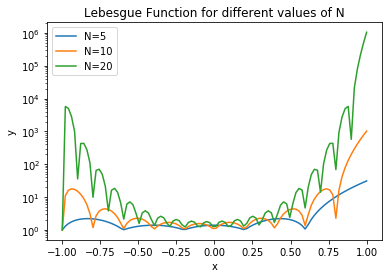

In [2]:
# Compute the Lagrange basis (\ell_i(x))
def lagrange_basis(x, data):
    """
    Code taken from class and slightly modified. 
    Constructs the lagrange basis at values of x
    given some interpolation data
    
    Parameters
    ----------
    x: numpy.ndarray
        The x values to construct the basis at
    data: numpy.ndarray
        The interplating x values
    
    Returns
    -------
    basis: numpy.ndarray
        The lagrange polynomial basis at given values of x
    
    """
    basis = numpy.ones((data.shape[0], x.shape[0]))
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            if i != j:
                basis[i, :] *= (x - data[j]) / (data[i] - data[j])
    return basis            


def lebesgue(x, data):
    """Compute Lebesgue function for the points above
    
    :Input:
     - *x* (numpy.ndarray) x values that basis will be evaluated at
     - *data* (numpy.ndarray) Tuples representing interpolant points
     
    :Output:
     - (numpy.ndarray) Contains the ith Lagrangian basis evaluated at x
    """
    basis = lagrange_basis(x, data)
    return numpy.sum(numpy.absolute(basis), axis=0)

x = numpy.linspace(-1, 1, 100)

plt.figure()
for N in [5, 10, 20]:
    # Generate equally spaced points
    data = numpy.array([-1 + (2 * i) / N for i in range(N)])
    
    # Get lebesgue function
    leb = lebesgue(x, data)
    
    # Plot
    plt.semilogy(x, leb, label='N='+ str(N))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lebesgue Function for different values of N')

As N increases the function oscilates more and more wildly. The oscillations are strictly smallest near the midpoint of the interval and get larger as x moves further from the midpoint with the function being mostly symetrical. The maxima of these oscillations seem to be growing exponentially. The global maximum, which is the lebesque constant, seems to be at the very ends of the interval.

**(c)** (10 points) Plot the Lebesgue function for $x\in[-1, 1]$ for $N = 5, 10, 20$ for both kinds of Chebyshev nodes (roots and extrema).  Again comment on what you see in the case $N = 20$.

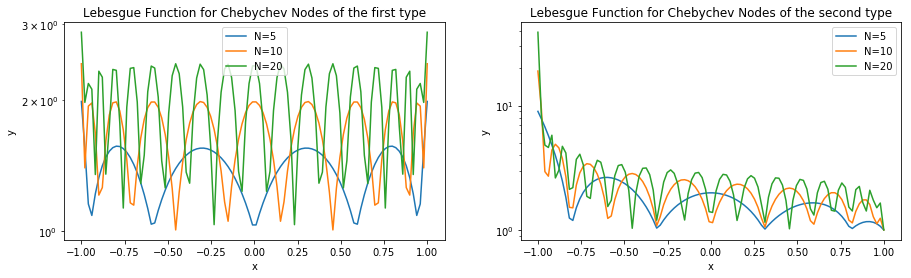

In [3]:
x = numpy.linspace(-1, 1, 100)

fig1 = plt.figure(figsize=(15,4))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)
for N in [5, 10, 20]:
    # Generate chev nodes
    chev_1_data = numpy.array([numpy.cos(((2 * k - 1)/(2*N)) * numpy.pi) for k in range(1, N + 1)])
    chev_2_data = numpy.array([numpy.cos((k/ N) * numpy.pi) for k in range(N)])
    
    # Construct lebesque function
    leb1 = lebesgue(x, chev_1_data)
    leb2 = lebesgue(x, chev_2_data)

    # Plot lebesque function
    axes1.semilogy(x, leb1, label='N='+ str(N))
    axes2.semilogy(x, leb2, label='N='+ str(N))

axes1.legend()
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('Lebesgue Function for Chebychev Nodes of the first type')

axes2.legend()
axes2.set_xlabel('x')
axes2.set_ylabel('y')
axes2.set_title('Lebesgue Function for Chebychev Nodes of the second type')


For nodes of the first type, as N grows, the frequency and magnitude of the oscillations increase. The maximum of these oscillations occurs at the center of the interval with the value of the maximum decreasing logrithmically towards the edges. 

For nodes of the second type, as N grows, again the frequency and magnitude of the oscillations increase. The maximum of these oscillations occurs near the beginning of the interval and the oscillations decrease strictly as x moves through the interval. The maxima are decreasing in a logrithmic manner 



**(d)** (5 points) What do you observe about the Lebesgue function for each of the distribution of points?

All of these functions oscillate, but do so in different manners and magnitudes. The maxima of the equally spaced points grow outwards exponentially, the 1st order chebychev maxima shrink out logrithmically and the 2nd order chebychev maxima shrink logrithmically from left to right. The magnitude of the humps is much greater for the equally spaced points than for Chebychev Nodes, which means that they are a much better choise for interpolation than equally spaced points.

**(e)** (5 points) Using suitable values for $N$ plot the Lebesgue constants of each of the above cases.  Make sure to use a suitably large number of points to evaluate the function at.  Graphically demonstrate that the constant grow with the predicted growth rate $\mathcal{O}(\log N)$.  Describe what you observe.

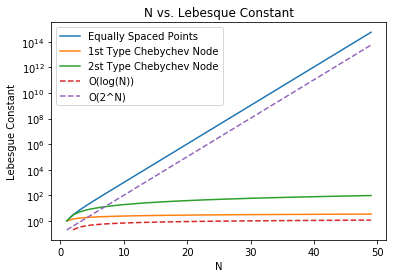

In [4]:
N_list = list(range(1, 50))
x = numpy.linspace(-1, 1, 1000)
leb_chev_1 = []
leb_chev_2 = []
leb_eqx = []
for N in N_list:
    eqx_data = numpy.array([-1 + (2 * i) / N for i in range(N)])
    chev_1_data = numpy.array([numpy.cos(((2 * k - 1)/(2*N)) * numpy.pi) for k in range(1, N + 1)])
    chev_2_data = numpy.array([numpy.cos((k/ N) * numpy.pi) for k in range(N)])

    leb_eqx.append(numpy.max(lebesgue(x, eqx_data)))
    leb_chev_1.append(numpy.max(lebesgue(x, chev_1_data)))
    leb_chev_2.append(numpy.max(lebesgue(x, chev_2_data)))
    
plt.figure()
plt.semilogy(N_list, leb_eqx, label='Equally Spaced Points')
plt.semilogy(N_list, leb_chev_1, label='1st Type Chebychev Node')
plt.semilogy(N_list, leb_chev_2, label='2st Type Chebychev Node')
plt.semilogy(N_list, 0.3 * numpy.log(N_list), linestyle='--', label='O(log(N))')
plt.semilogy(N_list, 0.1 * 2 ** numpy.array(N_list), linestyle='--', label='O(2^N)')
plt.legend()
plt.xlabel('N')
plt.ylabel('Lebesgue Constant')
plt.title('N vs. Lebesque Constant')

The Lebesque constants of the Chebychev Nodes grow logrithmically, while the constant of the equally spaced points grows exponentially. Again we see that using Chebychev Nodes to interpolate is much better than using equally spaced points.

## Question 4 - Condition Numbers for Polynomial Evaluations and Interpolation

A general concept that will become relevant as we move forward in the course is that of a **condition number**.  A condition number is some representation of the sensitivity of a solution to a problem to perturbations in the input data.  A well-conditioned algorithm will hopefully be less sensitive to input perturbations so as to avoid issues with things like floating point error.  In general condition numbers are frequently discussed in the following way.  Let
$$
    f(x) = y
$$
be some statement where $x$ is the input data, $y$ the result, and $\phi$ the algorithm used to produce $y$ from $x$.  If we perturb $x$ by $\delta_x$ there should be some corresponding change in $y$.  We can write this idea as
$$
    f(x + \delta_x) = y + \delta_y.
$$
We can then define a condition number $\kappa$ as the value that satisfies
$$
    ||\delta_y|| \leq \kappa||\delta_x||
$$
noting that $\kappa$ can depend on $x$.

Let us now consider how this applies to polynomial evaluations and interpolation.  Consider the polynomial
$$
    f(x) = \sum^n_{i=0} a_i \phi_i(x)
$$
for some polynomial basis $\phi_i(x)$.  We can perturb this polynomial such that
$$
    (f+\delta f)(x) = \sum^n_{i=0} a_i(1 + \delta_i) \phi_i(x)
$$
so that the coefficients are slightly perturbed (say due to error in the input data).  We can then say
$$
    |\delta f(x)| \leq \left( \sum^n_{i=0} |a_i||\phi_i(x)| \right) \max_{0 \leq i \leq n} |\delta_i|.
$$
Let
$$
    B(x) \equiv \sum^n_{i=0} |a_i| |\phi_i(x)|
$$
then it can be shown that
$$
    |\delta f(x)| \leq B(x) \max_{0 \leq i \leq n} |\delta_i|
$$
where we have now equated the condition number $\kappa$ to $B(x)$.

For the following questions consider the interval $x\in[-1, 1]$ and use equally spaced points as interpolation points.  Feel free to use whatever tools from `numpy` and `scipy` you feel you need to use.

**(a)** (10 points) Consider the scaled Wilkinson polynomial 
$$
    W_{20}(x) = \prod^{20}_{i=1} \left( x - \frac{i}{21} \right).
$$
Plot the condition number for the
 - Monomial basis ($\phi_i(x) = x^i$),
 - Lagrange basis,
 - Newton basis, and
 - Chebyshev basis.
 
Choose the degree of the polynomials such that each interpolant is in fact equivalent (i.e. it can exactly represent the Wilkinson polynomial).  Remark on what you observe.

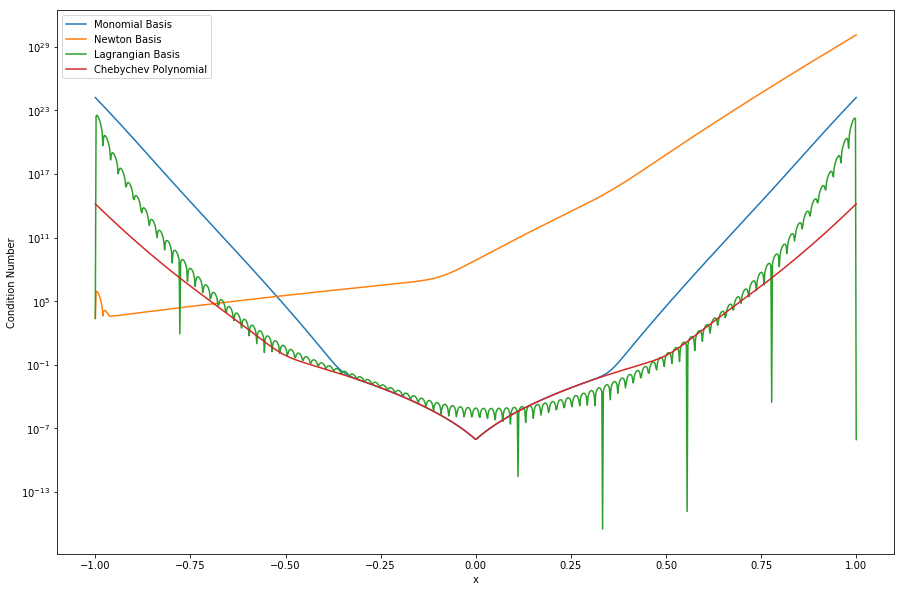

In [16]:
def monomial_cond(x, interp_x, interp_y):
    """
    Uses linalg to calculate the monomial condition number 
    function for given values of x and interpolation vectors 
    
    Parameters
    ----------
    x: numpy.ndarray
        The x values to construct the basis at
    interp_x: numpy.ndarray
        The interplating x values
    interp_y: numpy.ndarray
        The interplating y values
        
    Returns
    -------
    numpy.ndarray:
        The condition number function for given values of x
        
    """
    a = numpy.linalg.solve(numpy.vander(interp_x, N=None), interp_y) 
    return numpy.matmul(numpy.abs(numpy.vander(x, n)), numpy.abs(a))

def lagrange_cond(x, interp_x, interp_y):
    """
    Code taken from class and slightly modified. 
    Constructs the lagrange condition number function
    for given values of x and interpolation vectors 

    Parameters
    ----------
    x: numpy.ndarray
        The x values to construct the basis at
    data: numpy.ndarray
        The interplating x values

    Returns
    -------
    basis: numpy.ndarray
        The lagrange polynomial basis at given values of x

    """    
    basis = numpy.ones((interp_x.shape[0], x.shape[0]))
    for i in range(interp_x.shape[0]):
        for j in range(interp_x.shape[0]):
            if i != j:
                basis[i, :] *= (x - interp_x[j]) / (interp_x[i] - interp_x[j])
    return numpy.matmul(numpy.abs(basis.T), numpy.abs(interp_y))
    
def newton_cond(x, interp_x, interp_y):
    """
    Construct the newton basis condition number 
    function for given values of x and interpolation vectors 
    
    Parameters
    ----------
    x: numpy.ndarray
        The x values to construct the basis at
    interp_x: numpy.ndarray
        The interplating x values
    interp_y: numpy.ndarray
        The interplating y values
        
    Returns
    -------
    numpy.ndarray:
        The condition number function for given values of x
        
    """
    n = interp_x.shape[0]
    a = numpy.zeros (n)
    
    # Calculate the interpolation coefficients 
    for i in range (n):
        a[i] = interp_y[i]
    for i in range (1, n):
        for j in range (n - 1, i - 1, -1):
            a[j] = (a[j] - a[j-1]) / (interp_x[j] - interp_x[j-i])
    
    # Calculate the condition number
    cond = numpy.zeros(x.shape[0])
    for i in range(x.shape[0]):
        # Calculate the basis value
        tot = 0
        for j in range(a.shape[0]):
            basis_val = 1.0
            for k in range(j):
                basis_val *= (x[i] - interp_x[k])
            tot += numpy.abs(a[j]) * numpy.abs(basis_val)
        # Set the condition number for given x
        cond[i] = tot
    return cond

n = 100
f = lambda x: numpy.prod(numpy.array([x - (i/21) for i in range(1, 20 + 1)]), axis=0)
x = numpy.linspace(-1, 1, 1000)
interp_x = numpy.linspace(-1, 1, n)
interp_y = f(interp_x)

plt.figure(figsize=(15,10))
plt.ylabel('Condition Number')
plt.xlabel('x')

# Monomial Basis
plt.semilogy(x, monomial_cond(x, interp_x, interp_y), label="Monomial Basis")

# Newton Basis
plt.semilogy(x, newton_cond(x, interp_x, interp_y), label="Newton Basis")
    
# Lagrange Basis
plt.semilogy(x, lagrange_cond(x, interp_x, interp_y), label="Lagrangian Basis")

# Chebyshev Basis
interp_chev = numpy.array([numpy.cos(((2 * k - 1)/(2*n)) * numpy.pi) for k in range(1, n + 1)])
interp_chev_y = f(interp_chev)
plt.semilogy(x, monomial_cond(x, interp_chev, interp_chev_y), label="Chebychev Polynomial")

plt.legend()

The Monomial and Newton are the most poorly conditioned. The chebychev polynomial and the lagrangian basis are roughly equally well conditioned with the chebychev being slightly better. The lagrangian, monomial, and chebychev polynomials have the same general shape parabolic shape centered around the center of the interval, while the newton polynomial gets worse and worse conditioned as x moves through the range.

**(b)** (10 points) Repeat part (a) but for Runge's function
$$
    f(x) = \frac{1}{1 + 25 x^2}.
$$
Make sure to vary the degree of the polynomial for each basis.  Again remark on what you observe and how this compares to the above.

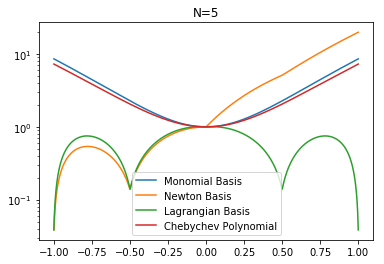

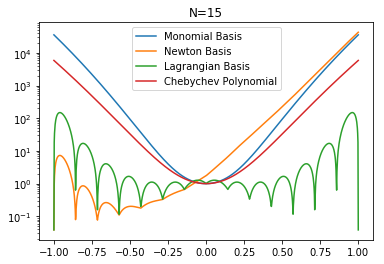

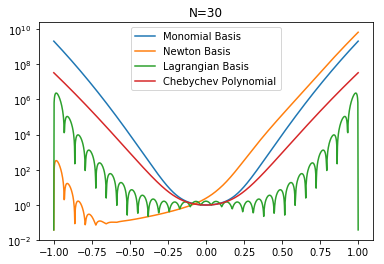

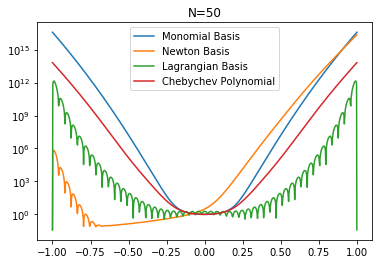

In [6]:
N = [5, 15, 30, 50]
f = lambda x: 1 / (1 + 25 * x **2)
x = numpy.linspace(-1, 1, 1000)

for n in N:
    interp_x = numpy.linspace(-1, 1, n)
    interp_y = f(interp_x)
    
    plt.figure()
    plt.title('N=' + str(n))
    # Monomial Basis
    plt.semilogy(x, monomial_cond(x, interp_x, interp_y), label="Monomial Basis")

    # Newton Basis
    plt.semilogy(x, newton_cond(x, interp_x, interp_y), label="Newton Basis")

    # Lagrange Basis
    plt.semilogy(x, lagrange_cond(x, interp_x, interp_y), label="Lagrangian Basis")

    # Chebyshev Basis
    interp_chev = numpy.array([numpy.cos(((2 * k - 1)/(2*n)) * numpy.pi) for k in range(1, n + 1)])
    interp_chev_y = f(interp_chev)
    plt.semilogy(x, monomial_cond(x, interp_chev, interp_chev_y), label="Chebychev Polynomial")

    plt.legend()

All the condition function have roughly the same shape, but here the lagrange basis is better conditioned than both the monomial and the chebychev polynomials for all values of N. As N increases, the function keeps the same shape, but the polynomial gets less and less well conditioned.

**(c)** (5 points) How does the Lebesgue function from question 3 relate to the results of this question (at least for the Lagrange basis)?

For the lagrangian basis, holds roughly the same shape as the lebesgue function with equally spaced points. This makes sense because the condition number is 
$$
B(x) = \sum_{i=0}^n|y_i||\ell_i(x)|
$$
Which is simply the lebesgue function with the added term $|y_i|$. Thus we can view the lebesgue function as version of the condition number with with the specific function normalized out, which means we can think of the lebesgue function as the relative condition number when using the lagrangian basis.

**(d)** (5 points) From these results which basis do you think one should use and why?

On these results, we should generally use the lagrangian basis because we get the most consistantly good conditioning with it and don't have to pick special interpolation points.  

## Question 5

(10 points) Use the uniqueness of the interpolating polynomial to show that for general $N+1$ points
$$
    \sum^N_{i=0} \ell_i(x) = 1
$$
at any value of $x$ (i.e. the interpolant of a constant is a constant regardless of $N$).

Hint:  Consider the Newton polynomial form and uniqueness.

The interpolation of the function $f(x) = 1$ in the lagrange form for a set of distinct points $x_1, ... x_{N+1}$ is

$$
P(x) = \sum_{i=1}^N f(x_i) \ell_i(x) 
$$

Since $f(x_i) = 1$ for all values of x, we can rewrite this expression as


$$
P(x) = \sum_{i=1}^N \ell_i(x) 
$$

Any constant function $f(x) = a$ can be interpolated without error for any given values of $x_1, ... x_{N+1}$ by an interpolation of degree 0. This is because in a degree 0 interpolation we simply find $P(x) = c$ that fits all of the points, so if we have a function $f(x) = a$, we can interpolate it exactly with $P(x) = a$. Since we are also assured that the interpolated polynomial is unique we can write that $f(x) = P(x) = 1$ for all values of x. So we have

$$
P(x) = \sum_{i=1}^N \ell_i(x) = 1   \\
\forall x \in \mathbb{R} 
$$
